In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, kstest, zscore
import statsmodels.api as sm

In [2]:
df_dados = pd.read_csv('./datasets/dados_de_irrigacao.csv')

In [3]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [5]:
df_dados.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [6]:
df_dados.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


In [10]:
print(df_dados.columns)

Index(['Horas de Irrigação', 'Área Irrigada', 'Área Irrigada por Ângulo'], dtype='object')


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

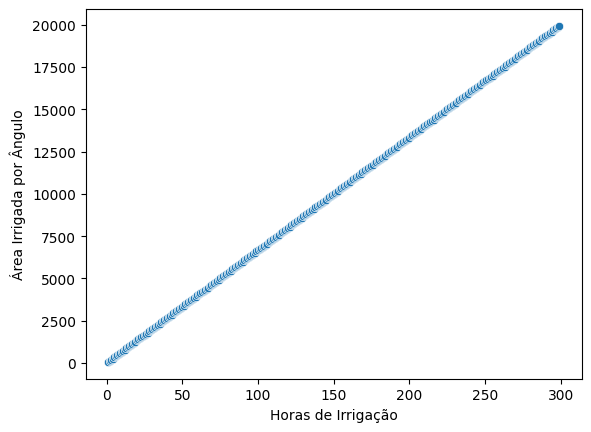

In [17]:
sns.scatterplot(data=df_dados, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

<Axes: ylabel='Horas de Irrigação'>

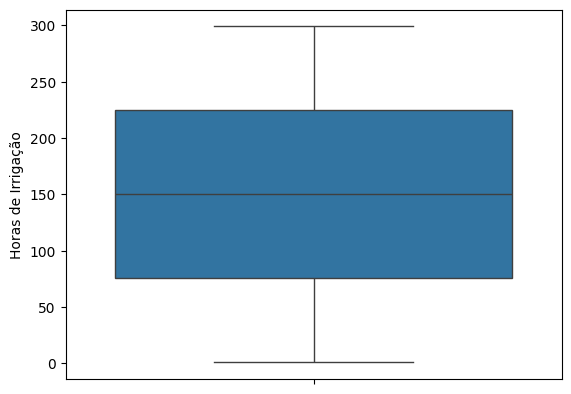

In [18]:
sns.boxplot(df_dados, y='Horas de Irrigação')

<Axes: ylabel='Área Irrigada por Ângulo'>

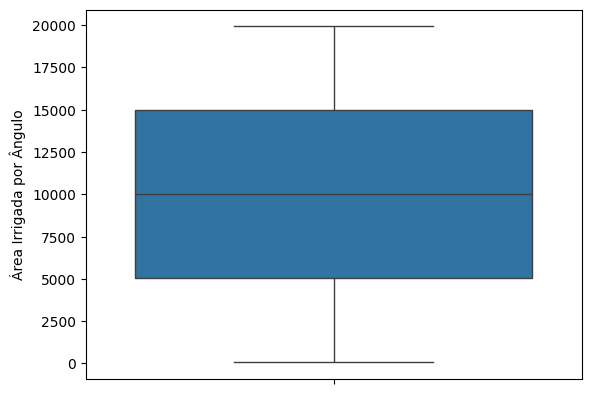

In [19]:
sns.boxplot(df_dados, y='Área Irrigada por Ângulo')

In [21]:
colunas_selecionadas = ['Horas de Irrigação', 'Área Irrigada por Ângulo']
df_subset = df_dados[colunas_selecionadas]

<Axes: >

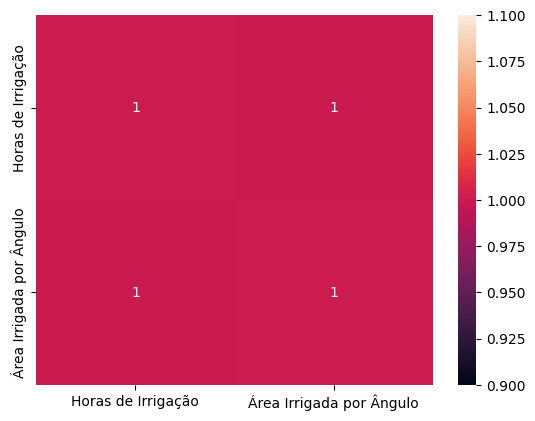

In [28]:
sns.heatmap(df_subset.corr(), annot=True)

<Axes: >

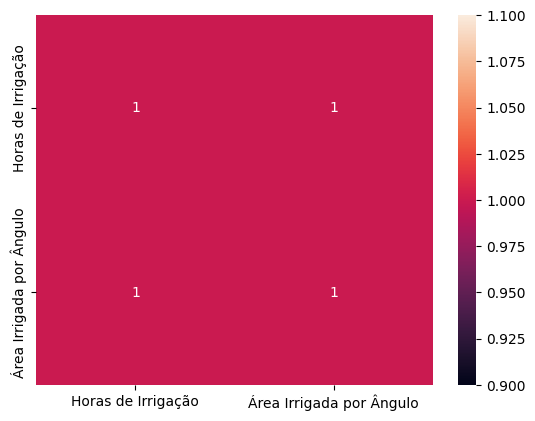

In [29]:
sns.heatmap(df_subset.corr('spearman'), annot=True)

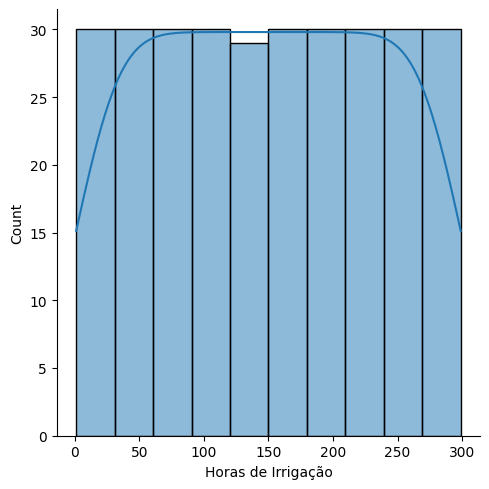

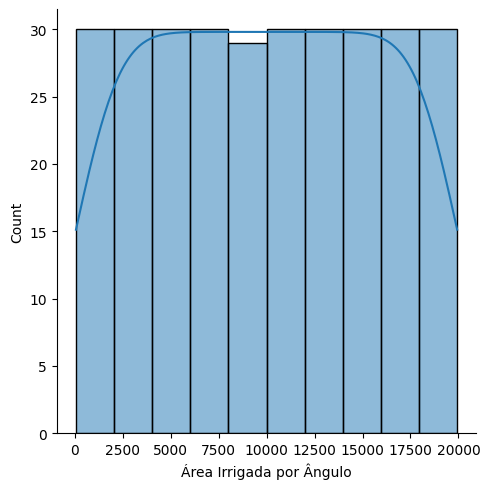

In [30]:
sns.displot(df_dados['Horas de Irrigação'], kde=True)
sns.displot(df_dados['Área Irrigada por Ângulo'], kde=True)

## Treino e Testes

In [32]:
X = df_dados['Horas de Irrigação'].values.reshape(-1, 1)
y = df_dados['Área Irrigada por Ângulo'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [33]:
reg_model = LinearRegression()

In [34]:
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
print("Equação da reta: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Equação da reta: y = 66.666667x + 0.000000


## Valida modelos e métricas

In [36]:
y_pred = reg_model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

1.0

In [39]:
mean_absolute_error(y_test, y_pred)

1.8764644159495625e-12

In [40]:
mean_squared_error(y_test, y_pred)

5.0788674199138044e-24